### Checkpoint 0

In [1]:
import syft as sy
import numpy as np
import pandas as pd
import torch
import time
import tenseal as ts
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from collections import OrderedDict

sy.load("tenseal")

In [2]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [3]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for data, labels in train_loader:
        data, labels = data.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, labels)
        loss.backward()
        optimizer.step()
        
    print('Train Epoch: {} \tLoss: {:.6f}'.format(epoch, loss.item()))

In [4]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)

    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return test_loss, correct, (100. * correct / len(test_loader.dataset))

In [5]:
class MnistDataset(torch.utils.data.Dataset):
    def __init__(self, data_path):
        # data loading
        df = pd.read_csv(data_path, dtype=np.float64)
        self.x = torch.from_numpy(df.iloc[:,1:].values)
        
        self.x = self.x.reshape(self.x.size(0),1,28,28)
        self.x = self.x.float() # why float?
        
        self.y = torch.from_numpy(df.iloc[:,0].values) 
        self.y = self.y.long() # why long?
        
        self.n_samples = df.shape[0]
        
    def __len__(self):
        return self.n_samples
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [6]:
start = time.time()

train_dataset = MnistDataset("C:/Users/dells/FMNIST/dataset/.client_2_train_data.csv")
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64,shuffle=True)

test_dataset = MnistDataset("C:/Users/dells/FMNIST/dataset/.client_2_test_data.csv")
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64,shuffle=True)

end = time.time()
print(f"Take dataset time: {float(end - start)} seconds")  

Take dataset time: 3.7240021228790283 seconds


In [7]:
start = time.time()

use_cuda = not False and torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
device

end = time.time()
print(f"Check device time: {float(end - start)} seconds")  

Check device time: 0.03999662399291992 seconds


In [8]:
start = time.time()
model = Classifier().to(device)
end = time.time()
print(f"Create model time: {float(end - start)} seconds")

Create model time: 2.58599853515625 seconds


### Context exchange

In [18]:
start = time.time()

bits_scale = 26
ctx = ts.context(
    ts.SCHEME_TYPE.CKKS,
    poly_modulus_degree=8192,
    coeff_mod_bit_sizes=[31, bits_scale, bits_scale, bits_scale, bits_scale, bits_scale, bits_scale, 31]
)
ctx.global_scale = pow(2, bits_scale)
ctx.generate_galois_keys()

sk = ctx.secret_key()
ctx.make_context_public()

end = time.time()

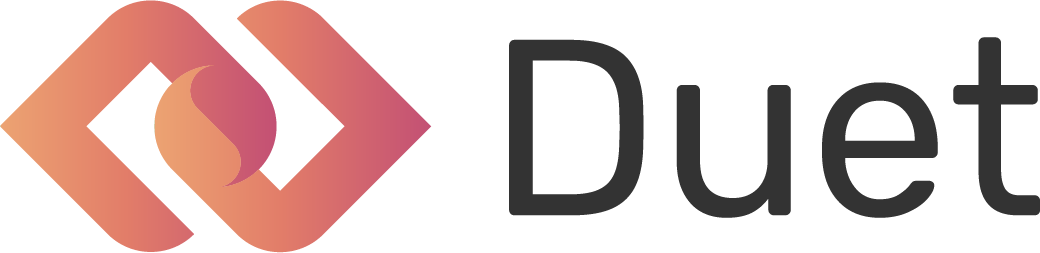

🎤  🎸  ♪♪♪ Starting Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ > Use at your own risk.


    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-218-7-180.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... 
♫♫♫ > DONE!

♫♫♫ > STEP 1: Send the following code to your Duet Partner!

import syft as sy
duet = sy.join_duet(loopback=True)

♫♫♫ > Connecting...

♫♫♫ > CONNECTED!

Train Epoch: 1 	Loss: 0.228771ects: 1  Requests: 0   Messages: 92  Request Handlers: 0                                                         
Test set: Average loss: 0.1012, Accuracy: 4847/4999 (97%)ages: 92  Request Handlers: 0                                

Train Epoch: 4 	Loss: 0.008430ects: 1  Requests: 0   Messages: 92  Request Handlers: 0                                
Train Epoch: 7 	Los

Test set: Average loss: 0.1173, Accuracy: 4928/4999 (99%)ages: 77  Request Handlers: 0                                

Train Epoch: 14 	Loss: 0.017118cts: 0  Requests: 0   Messages: 77  Request Handlers: 0                                
Test set: Average loss: 0.1264, Accuracy: 4921/4999 (98%)ages: 77  Request Handlers: 0                                

Train Epoch: 15 	Loss: 0.043007cts: 0  Requests: 0   Messages: 77  Request Handlers: 0                                
Test set: Average loss: 0.1347, Accuracy: 4923/4999 (98%)ages: 77  Request Handlers: 0                                

🎤  🎸  ♪♪♪ Starting Duet ♫♫♫  🎻  🎹  Requests: 0   Messages: 77  Request Handlers: 0                                

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ > Use at your own risk.


    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > DUET LIVE STATUS  -  Objects: 0  Requests: 0   Messages: 77  Request Handl

Test set: Average loss: 0.1341, Accuracy: 4918/4999 (98%)ages: 77  Request Handlers: 0                                

Train Epoch: 12 	Loss: 0.000005cts: 0  Requests: 0   Messages: 77  Request Handlers: 0                                
Test set: Average loss: 0.1436, Accuracy: 4922/4999 (98%)ages: 77  Request Handlers: 0                                

♫♫♫ > DUET LIVE STATUS  -  Objects: 0  Requests: 0   Messages: 77  Request Handlers: 0                                Train Epoch: 13 	Loss: 0.000842
Test set: Average loss: 0.1324, Accuracy: 4919/4999 (98%)ages: 77  Request Handlers: 0                                

Train Epoch: 14 	Loss: 0.000010cts: 0  Requests: 0   Messages: 77  Request Handlers: 0                                
♫♫♫ > DUET LIVE STATUS  *  Objects: 0  Requests: 0   Messages: 77  Request Handlers: 0                                Test set: Average loss: 0.1671, Accuracy: 4924/4999 (98%)

♫♫♫ > DUET LIVE STATUS  *  Objects: 0  Requests: 0   Messages: 77  Request 

♫♫♫ > Connecting...TUS  -  Objects: 0  Requests: 0   Messages: 77  Request Handlers: 0                                
♫♫♫ > DUET LIVE STATUS  -  Objects: 1  Requests: 0   Messages: 92  Request Handlers: 0                                
♫♫♫ > CONNECTED!
♫♫♫ > DUET LIVE STATUS  *  Objects: 0  Requests: 0   Messages: 77  Request Handlers: 0                                
♫♫♫ > DUET LIVE STATUS  -  Objects: 0  Requests: 0   Messages: 77  Request Handlers: 0                                                         Test set: Average loss: 0.1277, Accuracy: 4946/4999 (99%)

♫♫♫ > DUET LIVE STATUS  *  Objects: 0  Requests: 0   Messages: 77  Request Handlers: 0                                

In [20]:
duet = sy.launch_duet(loopback=True)

In [21]:
duet.store.pandas

,ID,Tags,Description,object_type
0,<UID: 6e250407ddf14cb5abff44105ec3fd3e>,[ctx],,<class 'tenseal.enc_context.Context'>


In [22]:
start = time.time()

context = duet.store["ctx"].get(delete_obj=False)

end = time.time()
print(f"Take context time: {float(end - start)} seconds")

Take context time: 5.96501350402832 seconds


In [19]:
print(f"Create context time: {float(end - start)} seconds")

Create context time: 2.071998357772827 seconds


In [30]:
start = time.time()

ctx_ptr = ctx.send(duet, pointable=True, tags=["owner_ctx"])

end = time.time()

In [31]:
print(f"Send context time: {float(end - start)} seconds")

Send context time: 6.606003046035767 seconds


In [32]:
duet.store.pandas

,ID,Tags,Description,object_type
0,<UID: 6e250407ddf14cb5abff44105ec3fd3e>,[ctx],,<class 'tenseal.enc_context.Context'>
1,<UID: 7b077ba81aa44387a4b2bdf077404306>,[owner_ctx],,<class 'tenseal.enc_context.Context'>


[2021-07-26T16:42:06.168485+0700][CRITICAL][logger]][11484] You do not have permission to .get() Object with ID: <UID: 7b077ba81aa44387a4b2bdf077404306>Please submit a request.
[2021-07-26T16:42:06.171458+0700][CRITICAL][logger]][11484] You do not have permission to .get() Object with ID: <UID: 7b077ba81aa44387a4b2bdf077404306>Please submit a request.


In [33]:
duet.requests.pandas

,Requested Object's tags,Reason,Request ID,Requested Object's ID,Requested Object's type
0,[owner_ctx],I would like to get the context,<UID: 07e8e5e09e1c44b1875231e1e86477fa>,<UID: 7b077ba81aa44387a4b2bdf077404306>,<class 'tenseal.enc_context.Context'>


In [34]:
duet.requests[0].accept()

### Training model

In [261]:
start = time.time()

optimizerLR = optim.Adam(model.parameters(), lr=0.001)
for epoch in range(1, 16):
    train(model, device, train_loader, optimizerLR, epoch)
    test(model, device, test_loader)
    
end = time.time()

In [262]:
print(f"Training time: {float(end - start)} seconds")  

Training time: 35.555328369140625 seconds


Exception in callback Transaction.__retry()
handle: <TimerHandle when=253132.062 Transaction.__retry()>
Traceback (most recent call last):
  File "C:\Users\dells\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\dells\anaconda3\lib\site-packages\aioice\stun.py", line 306, in __retry
    self.__future.set_exception(TransactionTimeout())
  File "C:\Users\dells\anaconda3\lib\asyncio\futures.py", line 246, in set_exception
    raise exceptions.InvalidStateError(f'{self._state}: {self!r}')
asyncio.exceptions.InvalidStateError: FINISHED: <Future finished result=(Message(messa...bp!\xd8E\x07'), ('192.168.2.1', 63178))>


In [263]:
test(model, device, test_loader)

(0.21738856102050533, 4925, 98.51970394078816)

In [264]:
start = time.time()

torch.save(model.state_dict(), "mnist_ann2.pt")

end = time.time()

In [265]:
print(f"Saving time: {float(end - start)} seconds")  

Saving time: 0.007018089294433594 seconds


In [266]:
start = time.time()

load_model = torch.load('mnist_ann2.pt')

end = time.time()

In [267]:
print(f"Load params time: {float(end - start)} seconds")

Load params time: 0.01300048828125 seconds


In [268]:
start = time.time()

fc1_weight = load_model["fc1.weight"].tolist()
fc1_bias = load_model["fc1.bias"].tolist()

fc2_weight = load_model["fc2.weight"].tolist()
fc2_bias = load_model["fc2.bias"].tolist()

fc3_weight = load_model["fc3.weight"].tolist()
fc3_bias = load_model["fc3.bias"].tolist()

fc4_weight = load_model["fc4.weight"].tolist()
fc4_bias = load_model["fc4.bias"].tolist()

end = time.time()


In [269]:
print(f"Take w+b time: {float(end - start)} seconds")

Take w+b time: 0.005999326705932617 seconds


In [270]:
start = time.time()

enc_fc1_weight = [[] for i in range(128)]
enc_fc2_weight = [[] for i in range(64)]
enc_fc3_weight = [[] for i in range(32)]
enc_fc4_weight = [[] for i in range(10)]

#encrypt fc1 layer
for i in range(len(fc1_weight)):
    x = ts.ckks_vector(context, fc1_weight[i])
    enc_fc1_weight[i] = x
enc_fc1_bias = ts.ckks_vector(context, fc1_bias)

#encrypt fc2 layer
for i in range(len(fc2_weight)):
    x = ts.ckks_vector(context, fc2_weight[i])
    enc_fc2_weight[i] = x
enc_fc2_bias = ts.ckks_vector(context, fc2_bias)

#encrypt fc3 layer
for i in range(len(fc3_weight)):
    x = ts.ckks_vector(context, fc3_weight[i])
    enc_fc3_weight[i] = x
enc_fc3_bias = ts.ckks_vector(context, fc3_bias)

#encrypt fc4 layer
for i in range(len(fc4_weight)):
    x = ts.ckks_vector(context, fc4_weight[i])
    enc_fc4_weight[i] = x
enc_fc4_bias = ts.ckks_vector(context, fc4_bias)

end = time.time()

In [271]:
print(f"Encrypt time: {float(end - start)} seconds")

Encrypt time: 3.039299488067627 seconds


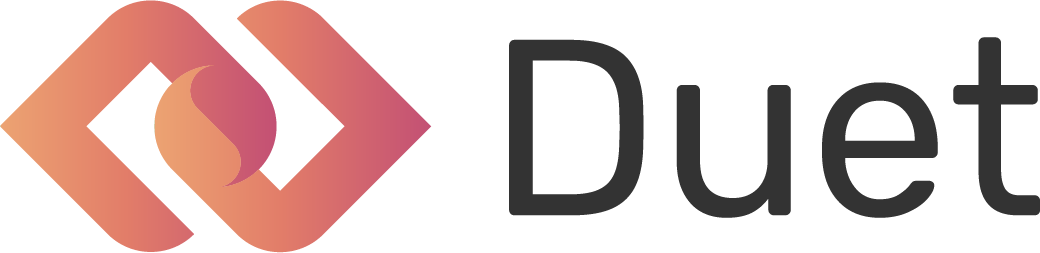

In [272]:
duet = sy.launch_duet(loopback=True)

In [273]:
start = time.time()

enc_fc1_weight_ptr = sy.lib.python.List(enc_fc1_weight).send(duet, pointable=True, tags=["enc_fc1_weight"])
enc_fc1_bias_ptr = enc_fc1_bias.send(duet, pointable=True, tags=["enc_fc1_bias"])
enc_fc2_weight_ptr = sy.lib.python.List(enc_fc2_weight).send(duet, pointable=True, tags=["enc_fc2_weight"])
enc_fc2_bias_ptr = enc_fc2_bias.send(duet, pointable=True, tags=["enc_fc2_bias"])
enc_fc3_weight_ptr = sy.lib.python.List(enc_fc3_weight).send(duet, pointable=True, tags=["enc_fc3_weight"])
enc_fc3_bias_ptr = enc_fc3_bias.send(duet, pointable=True, tags=["enc_fc3_bias"])
enc_fc4_weight_ptr = sy.lib.python.List(enc_fc4_weight).send(duet, pointable=True, tags=["enc_fc4_weight"])
enc_fc4_bias_ptr = enc_fc4_bias.send(duet, pointable=True, tags=["enc_fc4_bias"])

end = time.time()

In [274]:
print(f"Send params time: {float(end - start)} seconds")

Send params time: 8.270519256591797 seconds


In [275]:
duet.store.pandas

,ID,Tags,Description,object_type
0,<UID: 1017fb12d76d4cf8b5c674b199a8fe2a>,[enc_fc1_weight],,<class 'syft.lib.python.list.List'>
1,<UID: b3488740da6c46cf9813739ac04898b5>,[enc_fc1_bias],,<class 'tenseal.tensors.ckksvector.CKKSVector'>
2,<UID: a0a29d7bf139431b87b69a06d68c1763>,[enc_fc2_weight],,<class 'syft.lib.python.list.List'>
3,<UID: 34c98e7b8ea043af9a0052a02b0e715e>,[enc_fc2_bias],,<class 'tenseal.tensors.ckksvector.CKKSVector'>
4,<UID: e3633692e50e4402af1e3542038aa241>,[enc_fc3_weight],,<class 'syft.lib.python.list.List'>
5,<UID: e7eeb74b7bdb46a7acc62e2e80071080>,[enc_fc3_bias],,<class 'tenseal.tensors.ckksvector.CKKSVector'>
6,<UID: 2246c4c6cf9645e2837a5ad56431f46a>,[enc_fc4_weight],,<class 'syft.lib.python.list.List'>
7,<UID: dc4623945be24280a4e6c282b4ecab6c>,[enc_fc4_bias],,<class 'tenseal.tensors.ckksvector.CKKSVector'>


### Checkpoint

In [276]:
duet.requests.pandas

,Requested Object's tags,Reason,Request ID,Requested Object's ID,Requested Object's type
0,[enc_fc1_weight],I would like to get the fc1 weight,<UID: 402e8533b32d432ab083de10e43ad833>,<UID: 1017fb12d76d4cf8b5c674b199a8fe2a>,<class 'syft.lib.python.list.List'>
1,[enc_fc1_bias],I would like to get the fc1 bias,<UID: 71dcd8abbf504069808944948104352d>,<UID: b3488740da6c46cf9813739ac04898b5>,<class 'tenseal.tensors.ckksvector.CKKSVector'>
2,[enc_fc2_weight],I would like to get the fc2 weight,<UID: 8afaf2a0d56641b5b6d9802b2db4cd93>,<UID: a0a29d7bf139431b87b69a06d68c1763>,<class 'syft.lib.python.list.List'>
3,[enc_fc2_bias],I would like to get the fc2 bias,<UID: 6c552ec1f91d41128a1a51cc1e0733fe>,<UID: 34c98e7b8ea043af9a0052a02b0e715e>,<class 'tenseal.tensors.ckksvector.CKKSVector'>
4,[enc_fc3_weight],I would like to get the fc3 weight,<UID: 3adeb542a1444e9da21afe97e98dc6b2>,<UID: e3633692e50e4402af1e3542038aa241>,<class 'syft.lib.python.list.List'>
5,[enc_fc3_bias],I would like to get the fc3 bias,<UID: 3bd2ba7bcfe94415acd8c7b3aa85a310>,<UID: e7eeb74b7bdb46a7acc62e2e80071080>,<class 'tenseal.tensors.ckksvector.CKKSVector'>
6,[enc_fc4_weight],I would like to get the fc4 weight,<UID: 9d6c8ccdfa1e4a028d585ab9fa06b0bc>,<UID: 2246c4c6cf9645e2837a5ad56431f46a>,<class 'syft.lib.python.list.List'>
7,[enc_fc4_bias],I would like to get the fc4 bias,<UID: 9937c973e348478c9d644368a129581e>,<UID: dc4623945be24280a4e6c282b4ecab6c>,<class 'tenseal.tensors.ckksvector.CKKSVector'>


In [277]:
duet.requests[0].accept()
duet.requests[0].accept()
duet.requests[0].accept()
duet.requests[0].accept()
duet.requests[0].accept()
duet.requests[0].accept()
duet.requests[0].accept()
duet.requests[0].accept()

### Checkpoint 2

In [278]:
duet.store.pandas

,ID,Tags,Description,object_type
0,<UID: 31be32d6b39949d0b98db7b229633aab>,[global_fc1_weight],,<class 'syft.lib.python.list.List'>
1,<UID: de5f9c3d4ac24c1a92a5e015a47e7c1c>,[global_fc1_bias],,<class 'tenseal.tensors.ckksvector.CKKSVector'>
2,<UID: dd2f7575bf20406f9f5d1290b31e99e7>,[global_fc2_weight],,<class 'syft.lib.python.list.List'>
3,<UID: cbcb25786613445ebee7a147b832d720>,[global_fc2_bias],,<class 'tenseal.tensors.ckksvector.CKKSVector'>
4,<UID: 476bc135458b4beea3c50c115ceaa494>,[global_fc3_weight],,<class 'syft.lib.python.list.List'>
5,<UID: a6a0e4018b934b3ca5d05349d6b0c689>,[global_fc3_bias],,<class 'tenseal.tensors.ckksvector.CKKSVector'>
6,<UID: c4647f3636974d65adaffebf0b1e0668>,[global_fc4_weight],,<class 'syft.lib.python.list.List'>
7,<UID: 8b86ec1e8e044786ad5d69905bcf91fc>,[global_fc4_bias],,<class 'tenseal.tensors.ckksvector.CKKSVector'>


In [279]:
start = time.time()

updated_fc1_weight = duet.store["global_fc1_weight"].get()
updated_fc1_bias = duet.store["global_fc1_bias"].get()
updated_fc2_weight = duet.store["global_fc2_weight"].get()
updated_fc2_bias = duet.store["global_fc2_bias"].get()
updated_fc3_weight = duet.store["global_fc3_weight"].get()
updated_fc3_bias = duet.store["global_fc3_bias"].get()
updated_fc4_weight = duet.store["global_fc4_weight"].get()
updated_fc4_bias = duet.store["global_fc4_bias"].get()

end = time.time()

In [280]:
print(f"Get time: {float(end - start)} seconds")

Get time: 3.0257444381713867 seconds


In [281]:
start = time.time()

new_fc1_weight = [[] for i in range(128)]
new_fc2_weight = [[] for i in range(64)]
new_fc3_weight = [[] for i in range(32)]
new_fc4_weight = [[] for i in range(10)]

for i in range(len(updated_fc1_weight)):
    updated_fc1_weight[i].link_context(ctx)
    x = updated_fc1_weight[i].decrypt(sk)
    new_fc1_weight[i] = x
updated_fc1_bias.link_context(ctx)
new_fc1_bias = updated_fc1_bias.decrypt(sk)

for i in range(len(updated_fc2_weight)):
    updated_fc2_weight[i].link_context(ctx)
    x = updated_fc2_weight[i].decrypt(sk)
    new_fc2_weight[i] = x
updated_fc2_bias.link_context(ctx)
new_fc2_bias = updated_fc2_bias.decrypt(sk)

for i in range(len(updated_fc3_weight)):
    updated_fc3_weight[i].link_context(ctx)
    x = updated_fc3_weight[i].decrypt(sk)
    new_fc3_weight[i] = x
updated_fc3_bias.link_context(ctx)
new_fc3_bias = updated_fc3_bias.decrypt(sk)

for i in range(len(updated_fc4_weight)):
    updated_fc4_weight[i].link_context(ctx)
    x = updated_fc4_weight[i].decrypt(sk)
    new_fc4_weight[i] = x
updated_fc4_bias.link_context(ctx)
new_fc4_bias = updated_fc4_bias.decrypt(sk)

end = time.time()

In [282]:
print(f"Decrypted time: {float(end - start)} seconds")

Decrypted time: 2.2767202854156494 seconds


In [283]:
start = time.time()

avg_updates = OrderedDict()
avg_updates["fc1.weight"] = torch.Tensor(new_fc1_weight)
avg_updates["fc1.bias"] = torch.Tensor(new_fc1_bias)
avg_updates["fc2.weight"] = torch.Tensor(new_fc2_weight)
avg_updates["fc2.bias"] = torch.Tensor(new_fc2_bias)
avg_updates["fc3.weight"] = torch.Tensor(new_fc3_weight)
avg_updates["fc3.bias"] = torch.Tensor(new_fc3_bias)
avg_updates["fc4.weight"] = torch.Tensor(new_fc4_weight)
avg_updates["fc4.bias"] = torch.Tensor(new_fc4_bias)

end = time.time()

In [284]:
print(f"Create params time: {float(end - start)} seconds")

Create params time: 0.0060002803802490234 seconds


Exception in callback Transaction.__retry()
handle: <TimerHandle when=254002.531 Transaction.__retry()>
Traceback (most recent call last):
  File "C:\Users\dells\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\dells\anaconda3\lib\site-packages\aioice\stun.py", line 306, in __retry
    self.__future.set_exception(TransactionTimeout())
  File "C:\Users\dells\anaconda3\lib\asyncio\futures.py", line 246, in set_exception
    raise exceptions.InvalidStateError(f'{self._state}: {self!r}')
asyncio.exceptions.InvalidStateError: FINISHED: <Future finished result=(Message(messa...by43\xda\xf3'), ('192.168.2.1', 62392))>


In [285]:
start = time.time()

model.load_state_dict(avg_updates)

end = time.time()

In [286]:
print(f"Update time: {float(end - start)} seconds")

Update time: 0.002002716064453125 seconds


In [287]:
test(model, device, test_loader)

(0.12774522229228394, 4946, 98.93978795759152)